# TGK formalism for computation of diffusion coefficients

In [709]:
from pylab import *
import scipy.integrate
from scipy.optimize import minimize
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.stats import linregress
import iminuit 
from iminuit import Minuit
from scipy.signal import find_peaks

For PeV particles, the time step of measurements was $t = 0.1 \, r_L / c \sim 2.22\times 10^9$

In [1793]:
path = 'Data/TEST'

In [1794]:
VarDxx = np.zeros(len(logE))
VarDyy = np.zeros(len(logE))
VarDzz = np.zeros(len(logE))
for i in range(0, len(logE)):
    N = 15
    Dataxx = np.genfromtxt('{Path}/Diffusion_Coefficients/Variance/Data_for_variance_Dxx_10tothe{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Datayy = np.genfromtxt('{Path}/Diffusion_Coefficients/Variance/Data_for_variance_Dyy_10tothe{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Datazz = np.genfromtxt('{Path}/Diffusion_Coefficients/Variance/Data_for_variance_Dzz_10tothe{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Dataxy = np.genfromtxt('{Path}/Diffusion_Coefficients/Variance/Data_for_variance_Dxy_10tothe{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    
    VarDxx[i] = np.sum( (Dataxx - Dxx_disp[i])**2 ) / (N-1)
    VarDyy[i] = np.sum( (Datayy - Dyy_disp[i])**2 ) / (N-1)
    VarDzz[i] = np.sum( (Datazz - Dzz_disp[i])**2 ) / (N-1)
    
np.savetxt('{Path}/Diffusion_Coefficients/VarDxx_eta0.5.txt'.format(Path = path), VarDxx)
np.savetxt('{Path}/Diffusion_Coefficients/VarDyy_eta0.5.txt'.format(Path = path), VarDyy)
np.savetxt('{Path}/Diffusion_Coefficients/VarDzz_eta0.5.txt'.format(Path = path), VarDzz)

## Initial comparison with displacement method

In [1795]:
Dxx_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/Dxx_eta{turb}.txt'.format(Path = path, turb = eta))
Varxx_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/VarDxx_eta{turb}.txt'.format(Path = path, turb = eta))
Dyy_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/Dyy_eta{turb}.txt'.format(Path = path, turb = eta))
Varyy_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/VarDyy_eta{turb}.txt'.format(Path = path, turb = eta))
Dzz_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/Dzz_eta{turb}.txt'.format(Path = path, turb = eta))
Varzz_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/VarDzz_eta{turb}.txt'.format(Path = path, turb = eta))
Dxy_disp = np.genfromtxt('{Path}/Diffusion_Coefficients/Dxy_eta{turb}.txt'.format(Path = path, turb = eta))

sigmaxx = np.sqrt(Varxx_disp) / sqrt(15)
sigmazz = np.sqrt(Varzz_disp) / sqrt(15)

Text(0.5, 1.0, 'Diffusion coefficients of protons in turbulent field with $\\eta =$ 0.5')

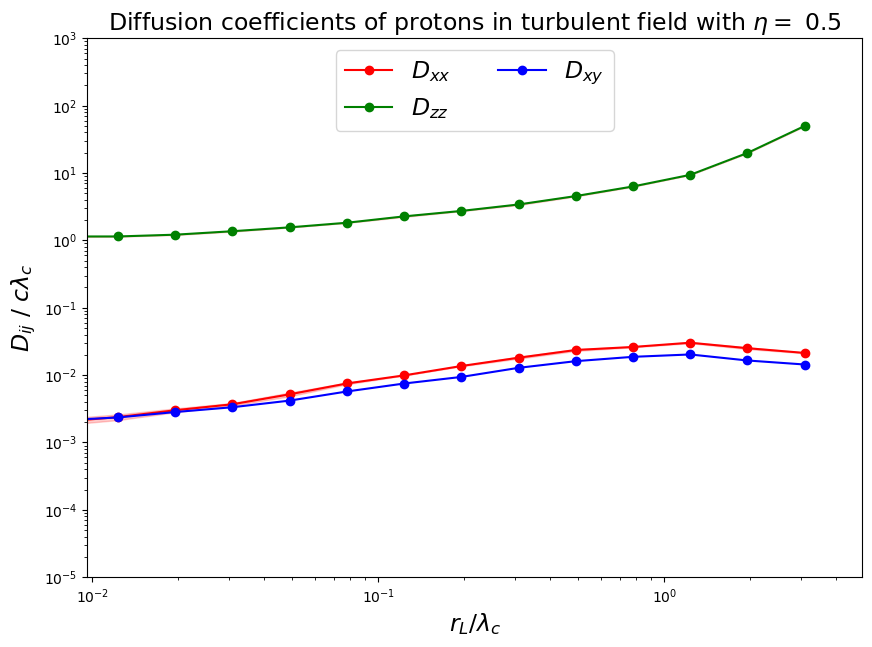

In [1796]:
plt.figure(figsize=(10, 7))
# Values
plt.plot(ratio, Dxx_disp / (l_c * c), '-o', color='red', label=r'$D_{xx}$')
plt.plot(ratio, Dzz_disp / (l_c * c), '-o', color='green', label=r'$D_{zz}$')
plt.plot(ratio, Dxy_disp / (l_c * c), '-o', color='blue', label=r'$D_{xy}$')
# Errors
plt.fill_between(ratio, (Dxx_disp - sigmaxx) / (l_c * c), (Dxx_disp + sigmaxx) / (l_c * c), color='red', alpha=0.2)
plt.fill_between(ratio, (Dzz_disp - sigmazz) / (l_c * c), (Dzz_disp + sigmazz) / (l_c * c), color='red', alpha=0.2)
# Marks
#plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
#plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.loglog()
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.ylim(1e-5, 1e3)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c$', fontsize=17)
plt.legend(ncol=2, fontsize=17, loc='upper center')
plt.title(r'Diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)

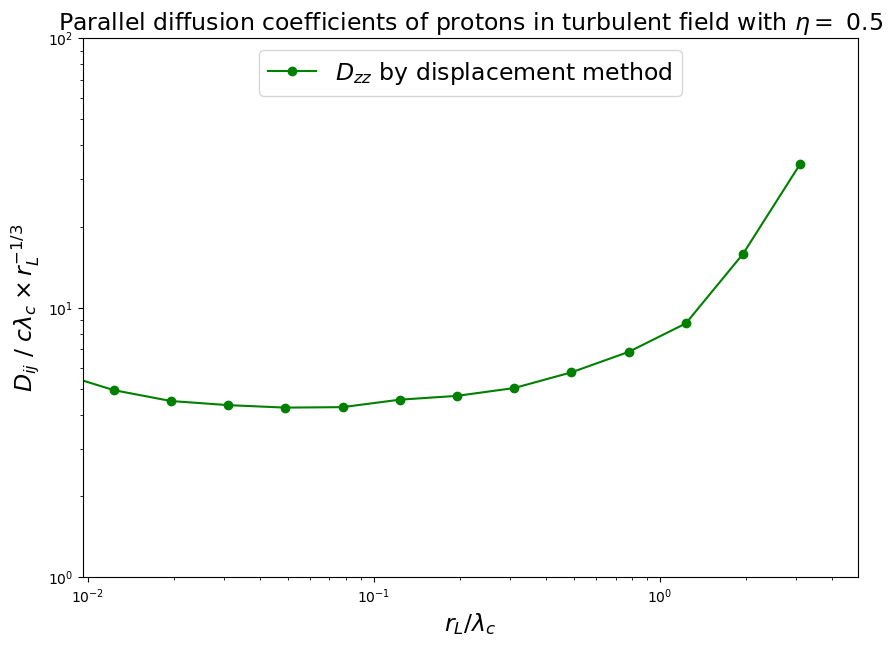

In [1797]:
alpha = - 1./3.
plt.figure(figsize=(10, 7))
plt.plot(ratio, Dzz_disp / (l_c * c) * ratio**alpha, '-o', color='green', label=r'$D_{zz}$ by displacement method')
plt.loglog()
plt.ylim(1e0, 1e2)
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c \times r_L^{-1/3}$', fontsize=17)
plt.legend(ncol=1, fontsize=17, loc='upper center')
plt.title(r'Parallel diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)
plt.savefig('parallel_diffusion.pdf')

Text(0.5, 1.0, 'Perpendicular diffusion coefficients of protons in turbulent field with $\\eta =$ 0.5')

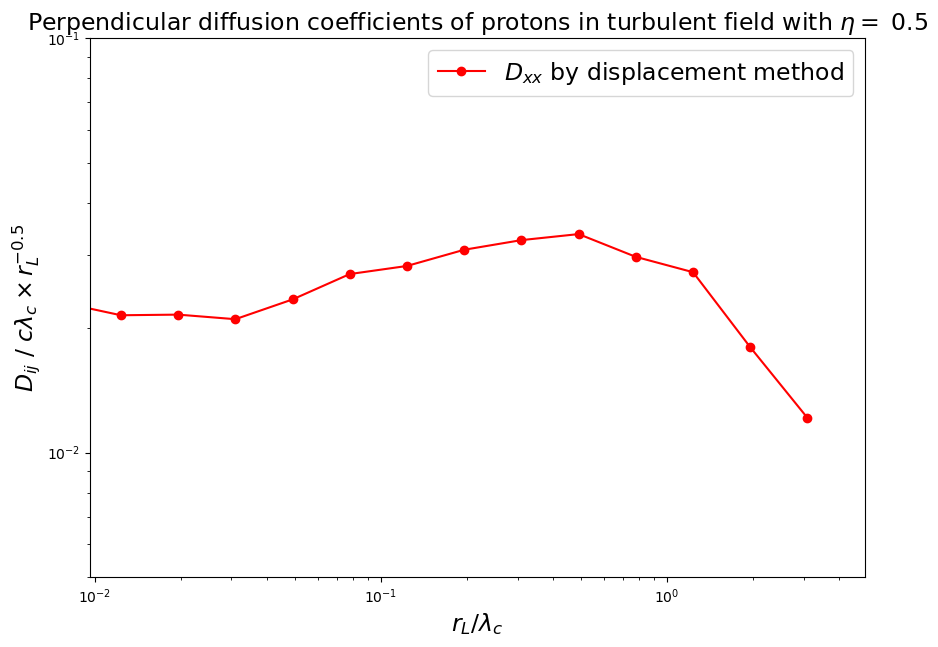

In [1798]:
alpha = -0.5

plt.figure(figsize=(10, 7))
plt.plot(ratio, Dxx_disp / (l_c * c) * ratio**alpha, '-o', color='red', label=r'$D_{xx}$ by displacement method')
plt.loglog()
plt.ylim(5e-3, 1e-1)
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c \times r_L^{-0.5}$', fontsize=17)
plt.legend(ncol=1, fontsize=17)
plt.title(r'Perpendicular diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)

## Quantities

In [1610]:
logE = np.round(np.arange(-2.0,1.2,0.2),decimals=1)
E0 = 10**logE * 1e15# Energy (eV)

# L = 8 Lmax
l_c = 3.121 * 3.086e+16 # in meters
Lmax = 15.36 * 3.086e+16 # in meters
Lmin = 0.03 * 3.086e+16 # in meters

In [1611]:
eta = 0.5 # Turbulence level
Z = 1 # Proton atomic number
c = 3e8 # Speed of light (m/s)
B_0 = 1e-6
dB = eta * B_0
B = np.sqrt(B_0**2 + dB**2) * 1e-4 # in T

In [1612]:
# Larmor radius
def r_L(E, B):
    # E in eV
    Z = 1
    c = 3e8
    r = E / (Z * B * c) # in m
    return r

In [1613]:
ratio = r_L(E0, B) / l_c

## Correlation functions

$R_{ij}(t) = \left< v_i(0) v_j(t)\right>$ 

$R_{zz}(t) = \frac{c^2}{3} \, e^{-t/\tau_\parallel}$ 


$R_{xx}(t) = R_{yy}(t) = \frac{c^2}{3}\cos{\omega t} \, e^{-t/\tau_\perp}$


$R_{xy}(t) = -\frac{c^2}{3}\sin{\omega t} \, e^{-t/\tau_A}$

In [1771]:
def R_parallel(t, tau):
    return (c**2 / 3) * np.exp(- t / tau)

def R_perpendicular(t, energy, tau, omega):
    #omega = c / r_L(energy, B)
    return (c**2 / 3) * np.cos(omega * t) * np.exp(- t / tau)

def R_antisymmetric(t, energy, tau, omega):
    #omega = c / r_L(energy, B)
    return - (c**2 / 3) * np.sin(omega * t) * np.exp(- t / tau)

## Diffusion coefficients

In [1772]:
def D_parallel(tau):
    return (c**2 / 3) * tau

def D_perpendicular(energy, tau):
    omega = c / r_L(energy, B)
    return (c**2 / 3) * tau * (1 / (1 + (omega * tau)**2))

def D_antisymmetric(energy, tau, omega):
    #omega = c / r_L(energy, B)
    return (c**2 / 3) * omega * tau**2 * (1 / (1 + (omega * tau)**2))

## Parallel component analysis

In [1774]:
# Fit parameters using Minuit
tau_parallel = np.zeros(len(logE))
# Errors
error_tau_parallel = np.zeros(len(logE))
# Chi^2
chi_sqrd_parallel = np.zeros(len(logE))
# Initial guesses
tau_guess_parallel = 1e10
limit_a = np.ones(5) * 400
limit_b = np.ones(5) * 400
limit_c = np.ones(6) * 1000
fit_limits = np.append(np.append(limit_a, limit_b), limit_c)
step_a = np.ones(11)*100
step_b = np.zeros(5)*100
initial_steps = np.append(step_a, step_b) 
#np.array((0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))

for i in range(0, len(logE)):
    time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Rzz = np.genfromtxt('{Path}/Correlation_Functions/Rzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Varzz = np.genfromtxt('{Path}/Variance/Varzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta)) 
    sigmazz = np.sqrt(Varzz) / sqrt(5e3)
    energy = 10**logE[i] * 1e15
    
    fit_limit = int(fit_limits[i])
    initial_step = int(initial_steps[i])
    
    def R_parallel_fit(tau):
        function = R_parallel(time[initial_step:fit_limit], tau) * (3 / c**2)
        simulation = Rzz[initial_step:fit_limit] * (3 / c**2)
        Sigma = sigmazz[initial_step:fit_limit] * (3 / c**2)
        return sum( (function - simulation)**2 / Sigma**2 )
    output_parallel = Minuit(R_parallel_fit, tau_guess_parallel)
    output_parallel.errordef = Minuit.LEAST_SQUARES
    output_parallel.simplex()
    output_parallel.migrad()
    output_parallel.hesse()
    tau_parallel[i] = output_parallel.values[0]
    error_tau_parallel[i] = output_parallel.errors[0]
    
    #fit = np.polyfit(time[0:fit_limit], np.log(Rzz[0:fit_limit]), 1)
    #tau_parallel[i] = - 1 / fit[0] 

In [1777]:
print('tau_para:', tau_parallel)
Dzz = D_parallel(tau_parallel)
error_parallel = (error_tau_parallel / tau_parallel) * Dzz

tau_para: [3.71974379e+09 2.41431856e+09 2.13048431e+09 1.99733643e+09
 2.36219007e+09 2.68833673e+09 3.02235037e+09 3.78681821e+09
 4.63090533e+09 6.03710268e+09 4.57112985e+09 4.18839195e+09
 7.98581319e+09 1.06141130e+10 2.24518318e+10 5.49804717e+10]


In [1778]:
error_tau_parallel

array([8.67235731e+06, 5.54566076e+06, 4.95651830e+06, 4.69286486e+06,
       5.26891427e+06, 5.90613627e+06, 6.77361690e+06, 8.55739341e+06,
       1.14479171e+07, 1.63679862e+07, 6.24159187e+06, 7.52782104e+06,
       1.29555179e+07, 1.81781559e+07, 3.49030062e+07, 1.41421356e+00])

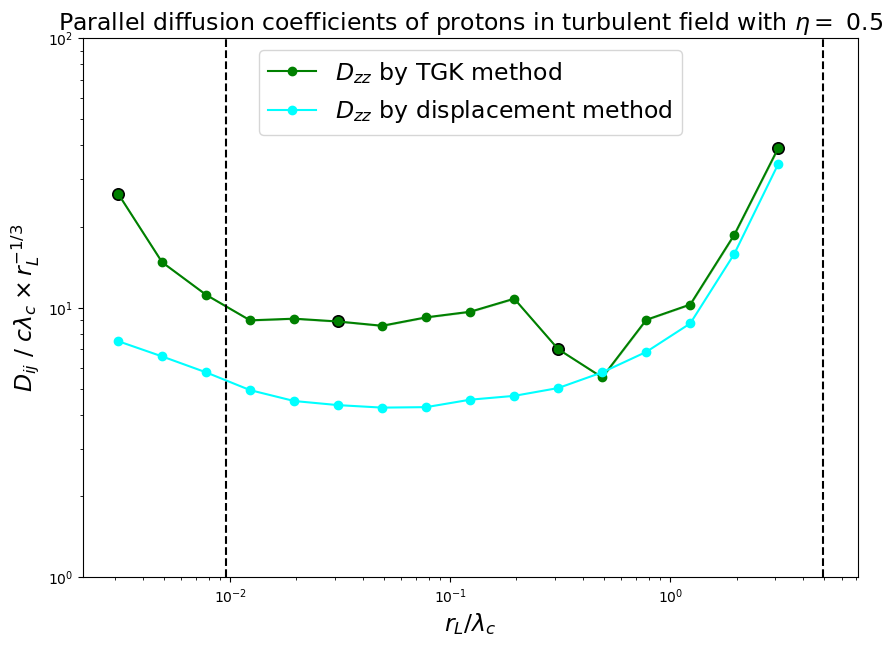

In [1779]:
alpha = - 1./3.
plt.figure(figsize=(10, 7))
# Values
plt.plot(ratio, Dzz / (l_c * c) * ratio**alpha, '-o', color='green', label=r'$D_{zz}$ by TGK method')
plt.plot(ratio, Dzz_disp / (l_c * c) * ratio**alpha, '-o', color='cyan', label=r'$D_{zz}$ by displacement method')
# Errors
plt.fill_between(ratio, (Dzz - error_parallel) / (l_c * c) * ratio**alpha, (Dzz + error_parallel) / (l_c * c) * ratio**alpha, color='green', alpha=0.2)
# Marks
plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.scatter(ratio[0], Dzz[0] / (l_c * c) * ratio[0]**alpha, s=70, c='black')
plt.scatter(ratio[5], Dzz[5] / (l_c * c) * ratio[5]**alpha, s=70, c='black')
plt.scatter(ratio[10], Dzz[10] / (l_c * c) * ratio[10]**alpha, s=70, c='black')
plt.scatter(ratio[15], Dzz[15] / (l_c * c) * ratio[15]**alpha, s=70, c='black')
plt.loglog()
plt.ylim(1e0, 1e2)
#plt.xlim(Lmin / l_c, Lmax / l_c)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c \times r_L^{-1/3}$', fontsize=17)
plt.legend(ncol=1, fontsize=17, loc='upper center')
plt.title(r'Parallel diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)
plt.savefig('parallel_diffusion.pdf')

In [1767]:
# Points used for slope computation
ratio_slope = np.log10(ratio[4:9])
Dzz_slope = np.log10(Dzz[4:9])

print('Parellel diffusion')
line_Dzz = linregress(ratio_slope, Dzz_slope)
print('Slope for Dzz:', line_Dzz[0])

Parellel diffusion
Slope for Dzz: 0.3126173406571216


Text(0.5, 0, '$t \\, c / r_L$')

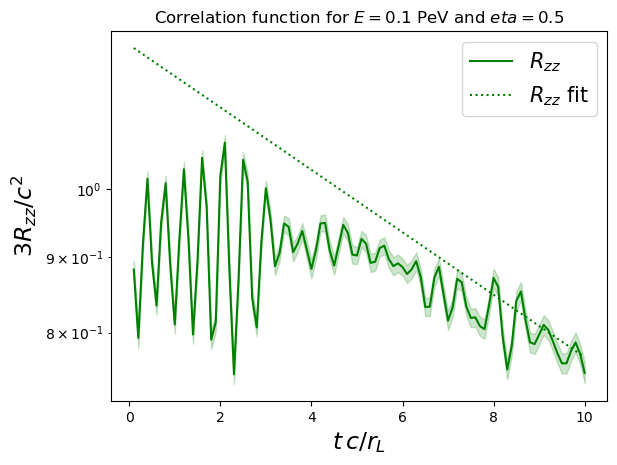

In [1770]:
# Test of lower energies
data_point = 5
data_length = 1000

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rzz = np.genfromtxt('{Path}/Correlation_Functions/Rzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varzz = np.genfromtxt('{Path}/Variance/Varzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
sigmazz = np.sqrt(Varzz) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rzz[0:data_length] * (3 / c**2), color='green', label=r'$R_{zz}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_parallel(time[0:data_length], tau_parallel[data_point]) * (3 / c**2), linestyle=':', color='green', label=r'$R_{zz}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rzz[0:data_length] + sigmazz[0:data_length]) * (3 / c**2), (Rzz[0:data_length] - sigmazz[0:data_length]) * (3 / c**2), color='green', alpha=0.2)
#plt.xlim(0,200)
plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

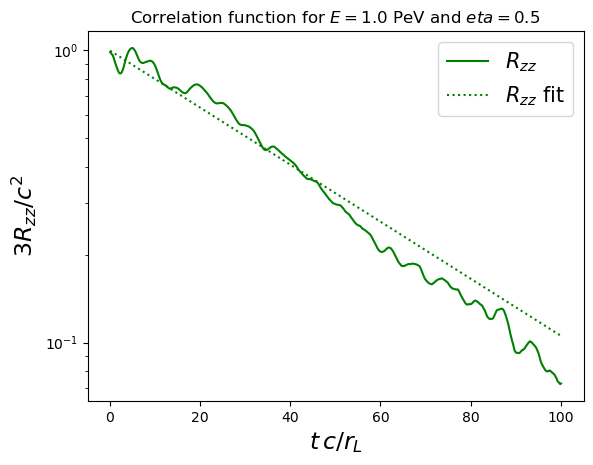

In [1747]:
# Test of medium energies
data_point = 10
data_length = 1000

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rzz = np.genfromtxt('{Path}/Correlation_Functions/Rzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varzz = np.genfromtxt('{Path}/Variance/Varzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
sigmazz = np.sqrt(Varzz) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rzz[0:data_length] * (3 / c**2), color='green', label=r'$R_{zz}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_parallel(time[0:data_length], tau_parallel[data_point]) * (3 / c**2), linestyle=':', color='green', label=r'$R_{zz}$ fit')
#plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rzz[0:data_length] + sigmazz[0:data_length]) * (3 / c**2), (Rzz[0:data_length] - sigmazz[0:data_length]) * (3 / c**2), color='green', alpha=0.2)
#plt.xlim(0,200)
plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

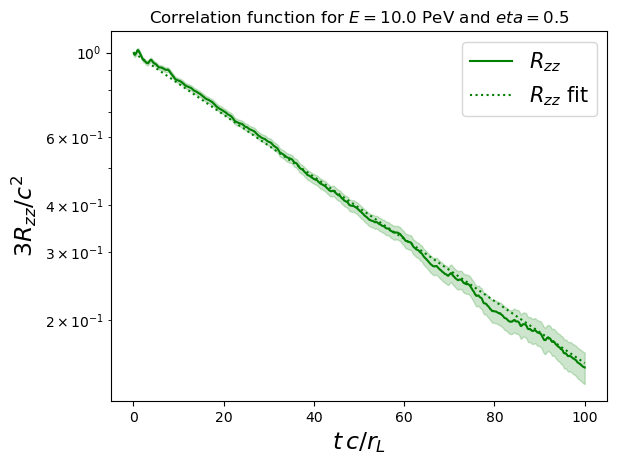

In [1740]:
# Test of medium energies
data_point = 15
data_length = 1000#600

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rzz = np.genfromtxt('{Path}/Correlation_Functions/Rzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varzz = np.genfromtxt('{Path}/Variance/Varzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
sigmazz = np.sqrt(Varzz) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rzz[0:data_length] * (3 / c**2), color='green', label=r'$R_{zz}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_parallel(time[0:data_length], tau_parallel[data_point]) * (3 / c**2), linestyle=':', color='green', label=r'$R_{zz}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rzz[0:data_length] + sigmazz[0:data_length]) * (3 / c**2), (Rzz[0:data_length] - sigmazz[0:data_length]) * (3 / c**2), color='green', alpha=0.2)
#plt.xlim(0,200)
plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Time scale according to displacement method: 3280512303.991808
Time sacel from fitting: 4571129848.227447


Text(0.5, 0, '$t \\, c / r_L$')

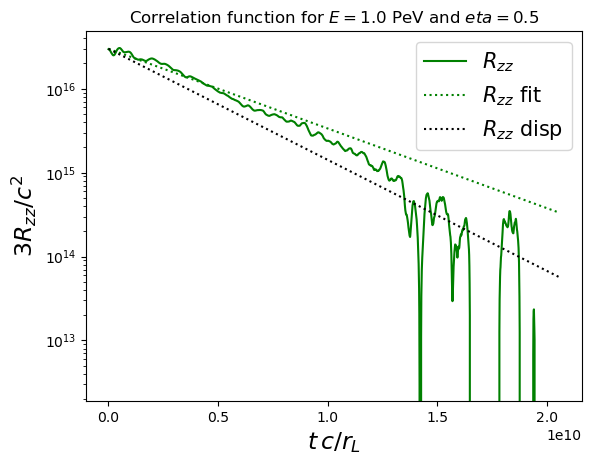

In [1756]:
# Here I do a test of how the function Rzz compares to data when using tau_zz given by Dzz from displacement method

tau_parallel_disp = Dzz_disp[10] / (c**2 / 3)
tau_bestfit = tau_parallel[10]

print('Time scale according to displacement method:', tau_parallel_disp)
print('Time sacel from fitting:', tau_bestfit)

data_point = 10
data_length = 2000
time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rzz = np.genfromtxt('{Path}/Correlation_Functions/Rzz_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
plt.plot(time[0:data_length] , Rzz[0:data_length] , color='green', label=r'$R_{zz}$')
plt.plot(time[0:data_length] , R_parallel(time[0:data_length], tau_bestfit) , linestyle=':', color='green', label=r'$R_{zz}$ fit')
plt.plot(time[0:data_length] , R_parallel(time[0:data_length], tau_parallel_disp) , linestyle=':', color='black', label=r'$R_{zz}$ disp')
plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

## Perpendicular component analysis

In [1628]:
def find_first_peaks(x, y, npeaks):
    """
    Identify the first N peaks in the data.
    
    Parameters:
        x (np.ndarray): Array of x values.
        y (np.ndarray): Array of y values.
        npeaks (int): Number of peaks to identify (default: 3).
    
    Returns:
        tuple: (peak_positions, first_peaks)
    """
    peaks, _ = find_peaks(y)
    
    if len(peaks) < npeaks:
        print(f"Warning: Only {len(peaks)} peaks found, expected {npeaks}.")
        npeaks = len(peaks)
    
    first_peaks = peaks[:npeaks]
    peak_positions = x[first_peaks]
    peaks = y[first_peaks]
    
    return peak_positions, peaks, first_peaks

In [1629]:
# Fit parameters using Minuit
tau_perpendicular = np.zeros(len(logE))
omega_perpendicular = np.zeros(len(logE))
# Errors
error_tau_perpendicular = np.zeros(len(logE))
error_omega_perpendicular = np.zeros(len(logE))
# Chi^2
chi_sqrd_perpendicular = np.zeros(len(logE))
# Guesses 
guess_a = np.ones(5) * 1e8
guess_b = np.ones(5) * 1e10
guess_c = np.ones(6) * 1e8
guess_perpendicular = np.append(np.append(guess_a, guess_b), guess_c)
limit_a = np.ones(5) * 500
limit_b = np.ones(5) * 500
limit_c = np.ones(6) * 500
fit_limits = np.append(np.append(limit_a, limit_b), limit_c)
npeaks = np.array((5, 5, 2, 10, 10, 10, 5, 5, 5, 2, 2, 3, 3, 10, 10, 10, 10))

for i in range(0, len(logE)):
    time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Rxx = np.genfromtxt('{Path}/Correlation_Functions/Rxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Ryy = np.genfromtxt('{Path}/Correlation_Functions/Ryy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Varxx = np.genfromtxt('{Path}/Variance/Varxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta)) 
    Varyy = np.genfromtxt('{Path}/Variance/Varyy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta)) 
    sigmaxx = np.sqrt(Varxx) / sqrt(5e3)
    sigmayy = np.sqrt(Varyy) / sqrt(5e3)
    energy = 10**logE[i] * 1e15
    
    omega_guess_perpendicular = c / r_L(energy, B)
    
    peak_positions, peaks, _ = find_first_peaks(time, Rxx, npeaks[i])
    distance_peaks = peak_positions[1] - peak_positions[0]
    omega_guess_perpendicular = 2 * np.pi / distance_peaks
    fit = np.polyfit(peak_positions, np.log(peaks), 1)
    tau_guess_perpendicular = - 1 / fit[0]
    
    def R_perpendicular_fit(tau, omega):
        function = R_perpendicular(time[0:fit_limit], energy, tau, omega) * (3 / c**2)
        simulation = Rxx[0:fit_limit] * (3 / c**2)
        Sigma = sigmaxx[0:fit_limit]
        return sum( (function - simulation)**2 / Sigma**2 )
    output_perpendicular = Minuit(R_perpendicular_fit, tau_guess_perpendicular, omega_guess_perpendicular)
    output_perpendicular.errordef = Minuit.LEAST_SQUARES
    output_perpendicular.simplex()
    output_perpendicular.migrad()
    output_perpendicular.hesse()
    tau_perpendicular[i] = output_perpendicular.values[0]
    omega_perpendicular[i] = output_perpendicular.values[1]
    error_tau_perpendicular[i] = output_perpendicular.errors[0]
    error_omega_perpendicular[i] = output_perpendicular.errors[1]
    
    ndof = len(time[0:fit_limit])
    chi_sqrd_perpendicular[i] = R_perpendicular_fit(tau_perpendicular[i], omega_perpendicular[i]) #/ ndof
    #tau_guess_perpendicular = tau_perpendicular[i] 

In [1630]:
print('tau_perp:', tau_perpendicular)
Dxx = D_perpendicular(E0, tau_perpendicular)
error_perpendicular = (error_tau_perpendicular / tau_perpendicular) * Dxx

tau_perp: [8.55962472e+07 6.27107933e+07 5.77320797e+07 9.18239473e+07
 1.04249402e+08 2.43755650e+08 2.79375044e+08 2.33080209e+08
 3.32483826e+08 3.80235399e+08 7.00001016e+08 1.37424342e+09
 2.65712044e+09 9.56215541e+09 1.99483363e+10 5.12772583e+10]


In [1631]:
error_tau_perpendicular

array([1.99999988e+00, 1.99999988e+00, 1.99999988e+00, 4.06810694e+22,
       1.99999988e+00, 6.57435414e+22, 2.63195562e+23, 4.73936170e+22,
       5.37300793e+22, 6.94224352e+22, 1.12660435e+23, 1.95680165e+23,
       3.18818925e+23, 9.63047969e+23, 2.11710577e+24, 8.02582012e+24])

Text(0.5, 1.0, 'Perpendicular diffusion coefficients of protons in turbulent field with $\\eta =$ 0.5')

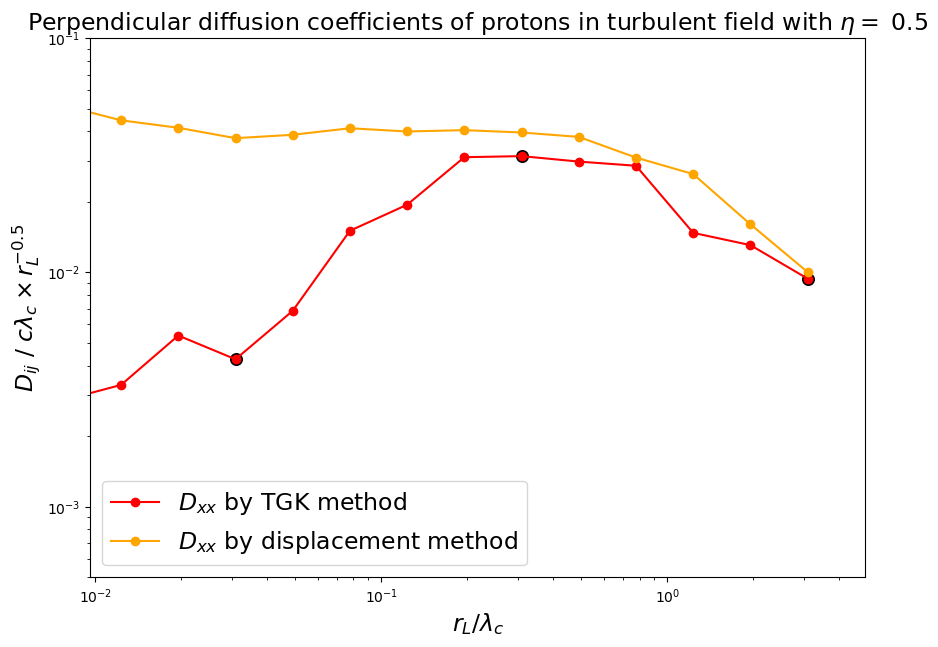

In [1633]:
alpha = -2./3.

plt.figure(figsize=(10, 7))
# Values
plt.plot(ratio, Dxx / (l_c * c) * ratio**alpha, '-o', color='red', label=r'$D_{xx}$ by TGK method')
plt.plot(ratio, Dxx_disp / (l_c * c) * ratio**alpha, '-o', color='orange', label=r'$D_{xx}$ by displacement method')
# Errors
#plt.fill_between(ratio, (Dxx - error_perpendicular) / (l_c * c) * ratio**alpha, (Dxx + error_perpendicular) / (l_c * c) * ratio**alpha, color='red', alpha=0.2)
# Marks
#plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
#plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.scatter(ratio[0], Dxx[0] / (l_c * c) * ratio[0]**alpha, s=70, c='black')
plt.scatter(ratio[5], Dxx[5] / (l_c * c) * ratio[5]**alpha, s=70, c='black')
plt.scatter(ratio[10], Dxx[10] / (l_c * c) * ratio[10]**alpha, s=70, c='black')
plt.scatter(ratio[15], Dxx[15] / (l_c * c) * ratio[15]**alpha, s=70, c='black')
plt.loglog()
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.ylim(5e-4, 1e-1)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c \times r_L^{-0.5}$', fontsize=17)
plt.legend(ncol=1, fontsize=17)
plt.title(r'Perpendicular diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)

In [1635]:
# Points used for slope computation
ratio_slope = np.log10(ratio[4:9])
Dxx_slope = np.log10(Dxx[4:9])

ratio_slope = np.log10(ratio[9:12])
Dxx_slope = np.log10(Dxx[9:12])

print('Perpendicular diffusion')
line_Dxx = linregress(ratio_slope, Dxx_slope)
print('Slope for Dxx:', line_Dxx[0])

Perpendicular diffusion
Slope for Dxx: 0.6199353226460323


Text(0.5, 0, '$t \\, c / r_L$')

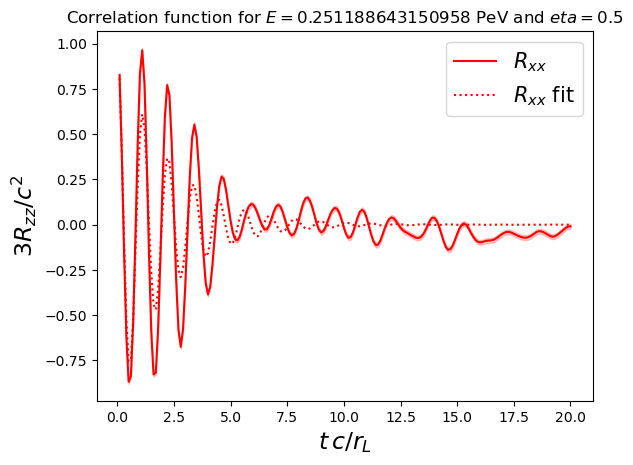

In [1636]:
# Test of lower energies
data_point = 7
data_length = 200

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxx = np.genfromtxt('{Path}/Correlation_Functions/Rxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxx = np.genfromtxt('{Path}/Variance/Varxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxx = np.sqrt(Varxx) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxx[0:data_length] * (3 / c**2), color='red', label=r'$R_{xx}$')
#plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Ryy[0:data_length] * (3 / c**2), color='orange', label=r'$R_{yy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_perpendicular(time[0:data_length], E, tau_perpendicular[data_point], omega_perpendicular[data_point]) * (3 / c**2), linestyle=':', color='red', label=r'$R_{xx}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxx[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxx[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='red', alpha=0.2)
#plt.xlim(0,20)
#plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

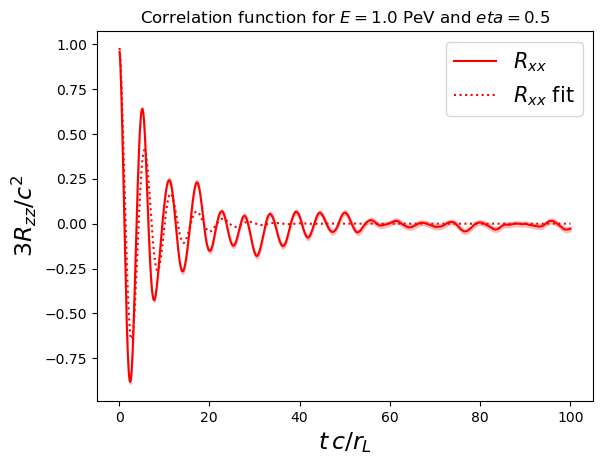

In [1472]:
# Test of lower energies
data_point = 10
data_length = 1000

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxx = np.genfromtxt('{Path}/Correlation_Functions/Rxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxx = np.genfromtxt('{Path}/Variance/Varxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxx = np.sqrt(Varxx) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxx[0:data_length] * (3 / c**2), color='red', label=r'$R_{xx}$')
#plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Ryy[0:data_length] * (3 / c**2), color='orange', label=r'$R_{yy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_perpendicular(time[0:data_length], E, tau_perpendicular[data_point], omega_perpendicular[data_point]) * (3 / c**2), linestyle=':', color='red', label=r'$R_{xx}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxx[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxx[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='red', alpha=0.2)
#plt.xlim(0,20)
#plt.yscale('log')
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

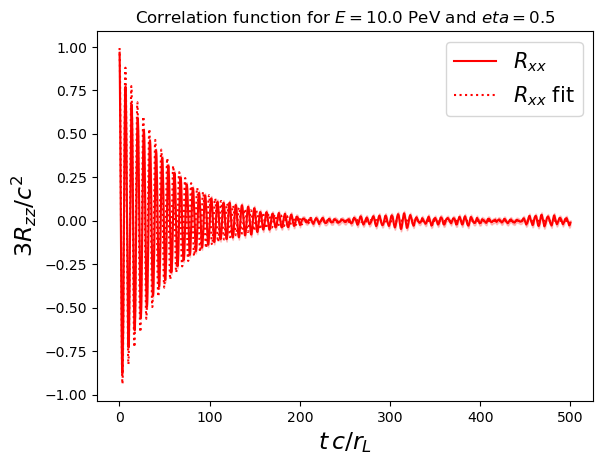

In [1473]:
# Test of lower energies
data_point = 15
data_length = 5000

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxx = np.genfromtxt('{Path}/Correlation_Functions/Rxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxx = np.genfromtxt('{Path}/Variance/Varxx_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxx = np.sqrt(Varxx) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxx[0:data_length] * (3 / c**2), color='red', label=r'$R_{xx}$')
#plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Ryy[0:data_length] * (3 / c**2), color='orange', label=r'$R_{yy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_perpendicular(time[0:data_length], E, tau_perpendicular[data_point], omega_perpendicular[data_point]) * (3 / c**2), linestyle=':', color='red', label=r'$R_{xx}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxx[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxx[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='red', alpha=0.2)
#plt.yscale('log')
#plt.xlim(0,20)
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

## Antisymmetric component analysis

In [1556]:
# Fit parameters using Minuit
tau_antisymmetric = np.zeros(len(logE))
omega_antisymmetric = np.zeros(len(logE))
# Errors
error_tau_antisymmetric = np.zeros(len(logE))
error_omega_antisymmetric = np.zeros(len(logE))
#tau_guess_antisymmetric = 1e10
npeaks = np.array((2, 2, 3, 5, 10, 10, 5, 3, 3, 2, 3, 3, 3, 10, 10, 10, 10))
for i in range(0, len(logE)):
    energy = E0[i]
    time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Rxy = np.genfromtxt('{Path}/Correlation_Functions/Rxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta))
    Varxy = np.genfromtxt('{Path}/Variance/Varxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[i], turb = eta)) 
    sigmaxy = np.sqrt(Varxy) / sqrt(5e3)

    #omega_guess_perpendicular = c / r_L(E, B)

    peak_positions, peaks, _ = find_first_peaks(time, Rxy, npeaks[i])
    distance_peaks = peak_positions[1] - peak_positions[0]
    omega_guess_antisymmetric = 2 * np.pi / distance_peaks
    fit = np.polyfit(peak_positions, np.log(peaks), 1)
    tau_guess_antisymmetric = - 1 / fit[0]
    
    def R_antisymmetric_fit(tau, omega):
        function = R_antisymmetric(time[0:fit_limit2], energy, tau, omega) * (3 / c**2)
        simulation = Rxy[0:fit_limit2] * (3 / c**2)
        Sigma = sigmaxy[0:fit_limit2]
        return sum( (function - simulation)**2 / Sigma**2 )
    output_antisymmetric = Minuit(R_antisymmetric_fit, tau_guess_antisymmetric, omega_guess_antisymmetric)
    output_antisymmetric.errordef = Minuit.LEAST_SQUARES
    output_antisymmetric.simplex()
    output_antisymmetric.migrad()
    output_antisymmetric.hesse()
    tau_antisymmetric[i] = output_antisymmetric.values[0]
    omega_antisymmetric[i] = output_antisymmetric.values[1]
    error_tau_antisymmetric[i] = output_antisymmetric.errors[0]
    error_omega_antisymmetric[i] = output_antisymmetric.errors[1]

    tau_guess_antisymmetric = tau_antisymmetric[i] 

In [1560]:
print('tau_anti:', tau_antisymmetric)
Dxy = D_antisymmetric(E0, tau_antisymmetric, omega_antisymmetric)
error_antisymmetric = (error_tau_antisymmetric / tau_antisymmetric) * Dxy

tau_anti: [ 4.26433783e+07  1.42441273e+08 -2.15826351e+09  8.21761032e+07
  9.31254191e+07  2.13096503e+08  2.72095321e+08  5.95632715e+08
  4.19700502e+08  4.11505585e+08  9.26942195e+08  1.49409121e+09
  2.69307631e+09  8.65640823e+09  2.28929544e+10  5.51381217e+10]


In [1564]:
error_tau_antisymmetric

array([1.99999988e+00, 1.74523491e+24, 1.99999988e+00, 7.01469581e+22,
       9.60062935e+23, 5.35199990e+22, 6.24327917e+22, 1.03688607e+23,
       6.70922621e+22, 7.04657750e+22, 1.23112182e+23, 2.13065699e+23,
       3.39612358e+23, 7.15822701e+23, 1.74498056e+24, 3.49345314e+24])

Text(0.5, 1.0, 'Antisymmetric diffusion coefficients of protons in turbulent field with $\\eta =$ 0.5')

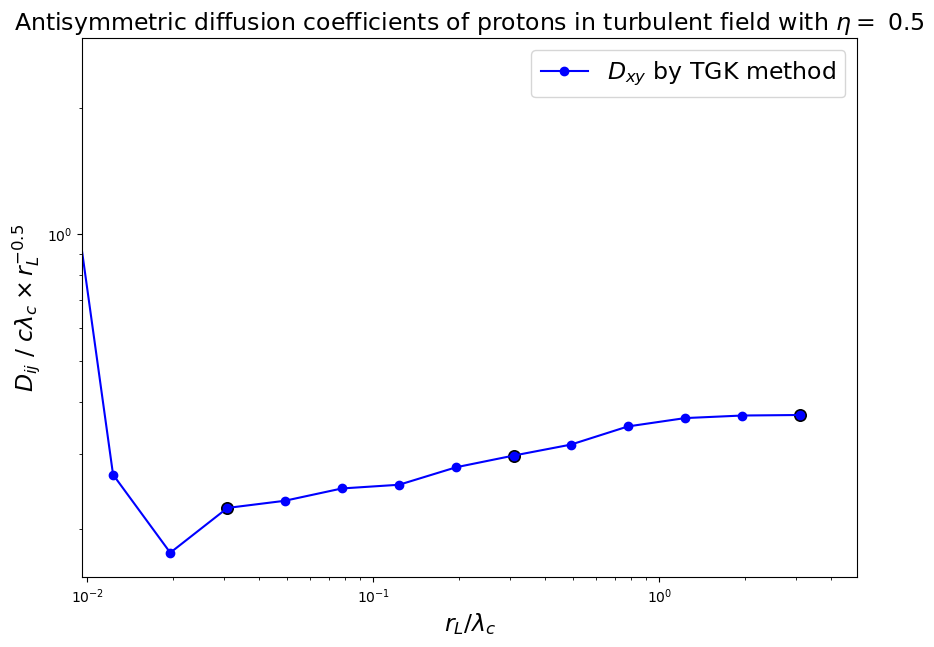

In [1565]:
alpha = -1
plt.figure(figsize=(10, 7))
# Values
plt.plot(ratio, Dxy / (l_c * c) * ratio**alpha, '-o', color='blue', label=r'$D_{xy}$ by TGK method')
# Errors
#plt.fill_between(ratio, (Dxy - error_antisymmetric) / (l_c * c) * ratio**alpha, (Dxy + error_antisymmetric) / (l_c * c) * ratio**alpha, color='blue', alpha=0.2)
# Marks
#plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
#plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.scatter(ratio[0], Dxy[0] / (l_c * c) * ratio[0]**alpha, s=70, c='black')
plt.scatter(ratio[5], Dxy[5] / (l_c * c) * ratio[5]**alpha, s=70, c='black')
plt.scatter(ratio[10], Dxy[10] / (l_c * c) * ratio[10]**alpha, s=70, c='black')
plt.scatter(ratio[15], Dxy[15] / (l_c * c) * ratio[15]**alpha, s=70, c='black')
plt.loglog()
#plt.ylim(1e-2, 1e-1)
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c \times r_L^{-0.5}$', fontsize=17)
plt.legend(ncol=1, fontsize=17)
plt.title(r'Antisymmetric diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)

In [1477]:
# Points used for slope computation
ratio_slope = np.log10(ratio[4:9])
Dxy_slope = np.log10(Dxy[4:9])

print('Perpendicular diffusion')
line_Dxy = linregress(ratio_slope, Dxy_slope)
print('Slope for Dxy:', line_Dxy[0])

Perpendicular diffusion
Slope for Dxy: 1.1846815873760923


Text(0.5, 0, '$t \\, c / r_L$')

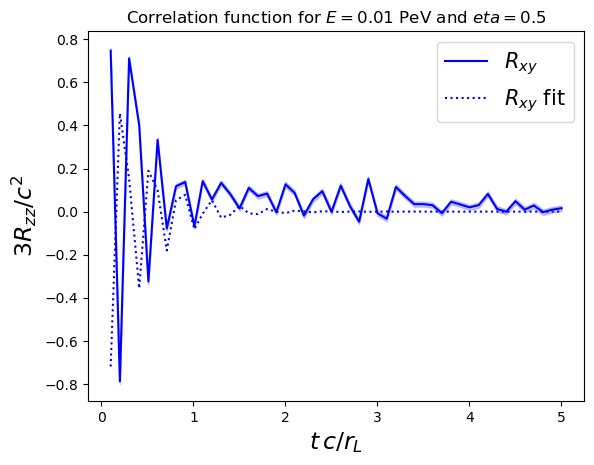

In [1478]:
# Test of lower energies
data_point = 0
data_length = 50

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxy = np.genfromtxt('{Path}/Correlation_Functions/Rxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxy = np.genfromtxt('{Path}/Variance/Varxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxy = np.sqrt(Varxy) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxy[0:data_length] * (3 / c**2), color='blue', label=r'$R_{xy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_antisymmetric(time[0:data_length], E, tau_antisymmetric[data_point], omega_antisymmetric[data_point]) * (3 / c**2), linestyle=':', color='blue', label=r'$R_{xy}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxy[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxy[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='blue', alpha=0.2)
#plt.xlim(0,20)
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

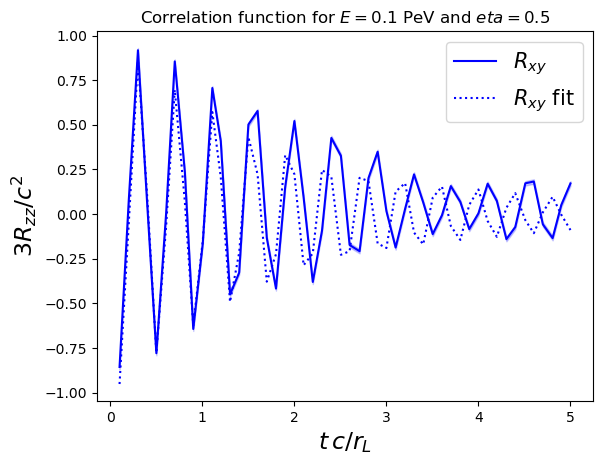

In [1479]:
# Test of lower energies
data_point = 5
data_length = 50

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxy = np.genfromtxt('{Path}/Correlation_Functions/Rxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxy = np.genfromtxt('{Path}/Variance/Varxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxy = np.sqrt(Varxy) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxy[0:data_length] * (3 / c**2), color='blue', label=r'$R_{xy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_antisymmetric(time[0:data_length], E, tau_antisymmetric[data_point], omega_antisymmetric[data_point]) * (3 / c**2), linestyle=':', color='blue', label=r'$R_{xy}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxy[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxy[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='blue', alpha=0.2)
#plt.xlim(0,20)
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

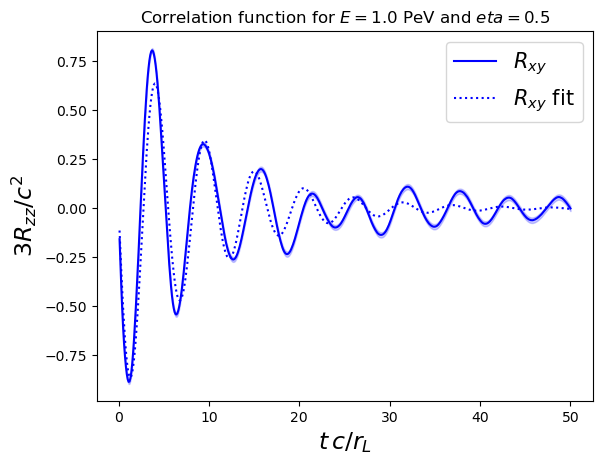

In [1480]:
# Test of lower energies
data_point = 10
data_length = 500

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxy = np.genfromtxt('{Path}/Correlation_Functions/Rxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxy = np.genfromtxt('{Path}/Variance/Varxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxy = np.sqrt(Varxy) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxy[0:data_length] * (3 / c**2), color='blue', label=r'$R_{xy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_antisymmetric(time[0:data_length], E, tau_antisymmetric[data_point], omega_antisymmetric[data_point]) * (3 / c**2), linestyle=':', color='blue', label=r'$R_{xy}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxy[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxy[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='blue', alpha=0.2)
#plt.xlim(0,20)
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

Text(0.5, 0, '$t \\, c / r_L$')

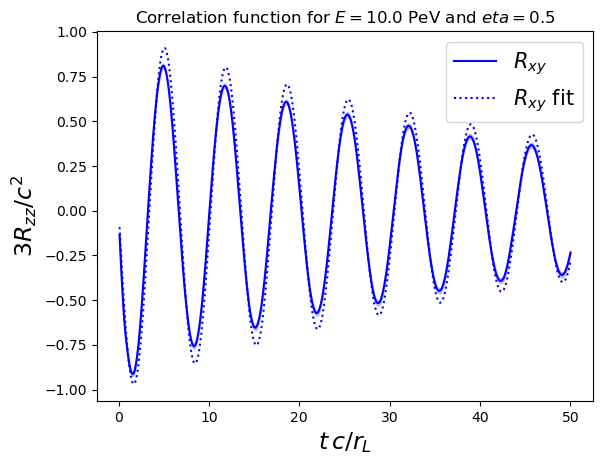

In [1481]:
# Test of lower energies
data_point = 15
data_length = 500

time = np.genfromtxt('{Path}/Time/time_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Rxy = np.genfromtxt('{Path}/Correlation_Functions/Rxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta))
Varxy = np.genfromtxt('{Path}/Variance/Varxy_1e{Elog}PeV_eta{turb}.txt'.format(Path = path, Elog = logE[data_point], turb = eta)) 
sigmaxy = np.sqrt(Varxy) / sqrt(5e3)
E = 10**logE[data_point] * 1e15
r_Larmor = np.ceil(r_L(E, B) * 3.24078e-17)

# Plot
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), Rxy[0:data_length] * (3 / c**2), color='blue', label=r'$R_{xy}$')
plt.plot(time[0:data_length] * c/(r_Larmor/3.24078e-17), R_antisymmetric(time[0:data_length], E, tau_antisymmetric[data_point], omega_antisymmetric[data_point]) * (3 / c**2), linestyle=':', color='blue', label=r'$R_{xy}$ fit')
plt.fill_between(time[0:data_length] * c/(r_Larmor/3.24078e-17), (Rxy[0:data_length] + sigmaxx[0:data_length]) * (3 / c**2), (Rxy[0:data_length] - sigmaxx[0:data_length]) * (3 / c**2), color='blue', alpha=0.2)
#plt.xlim(0,20)
plt.legend(fontsize=15)
plt.title(r'Correlation function for $E={energy}$ PeV and $eta={turb}$'.format(energy = E/1e15, turb = eta))
plt.ylabel(r'$3R_{zz} / c^2$', fontsize=17)
plt.xlabel(r'$t \, c / r_L$', fontsize=17)

## All-component analysis

Text(0.5, 1.0, 'Decorrelation time scales')

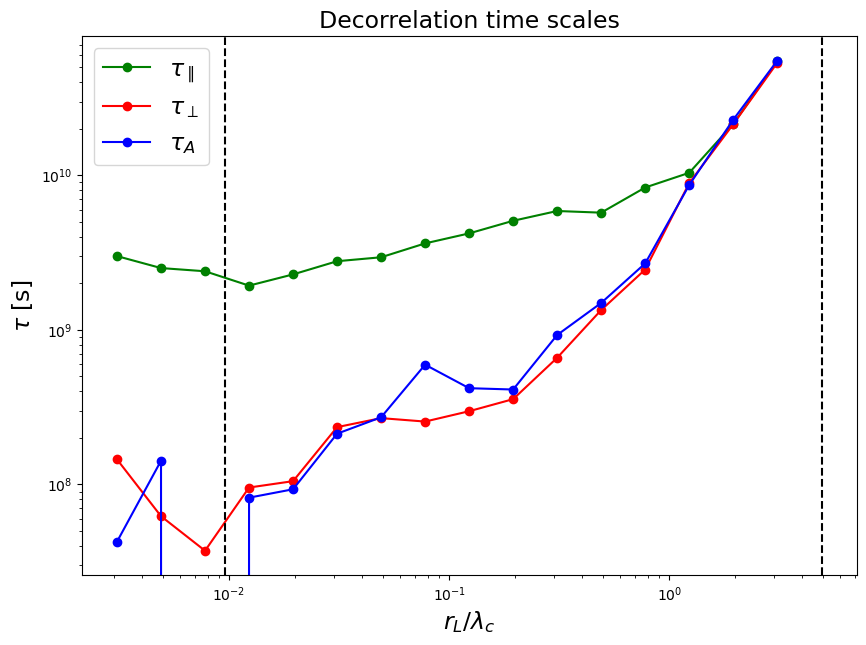

In [1482]:
plt.figure(figsize=(10, 7))
plt.plot(ratio, tau_parallel, '-o', color='green', label=r'$\tau_{\parallel}$')
plt.plot(ratio, tau_perpendicular, '-o', color='red', label=r'$\tau_{\perp}$')
plt.plot(ratio, tau_antisymmetric, '-o', color='blue', label=r'$\tau_{A}$')
plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.loglog()
#plt.ylim(1e24, 1e30)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$\tau$ [s]', fontsize=17)
plt.legend(ncol=1, fontsize=17)
plt.title('Decorrelation time scales'.format(turb = eta), fontsize=17)

Text(0.5, 1.0, 'Diffusion coefficients of protons in turbulent field with $\\eta =$ 0.5')

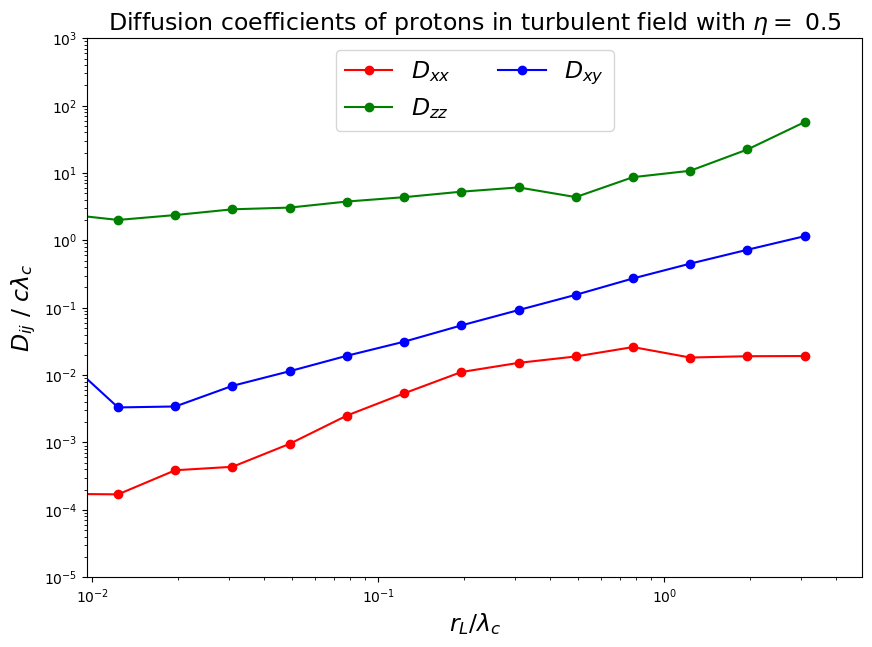

In [1487]:
# Plot of all diffusion coefficients
plt.figure(figsize=(10, 7))
plt.plot(ratio, Dxx / (l_c * c), '-o', color='red', label=r'$D_{xx}$')
plt.plot(ratio, Dzz / (l_c * c), '-o', color='green', label=r'$D_{zz}$')
plt.plot(ratio, Dxy / (l_c * c), '-o', color='blue', label=r'$D_{xy}$')
#plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
#plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.loglog()
plt.xlim(Lmin / l_c, Lmax / l_c)
plt.ylim(1e-5, 1e3)
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_{ij}$ / $c \lambda_c$', fontsize=17)
plt.legend(ncol=2, fontsize=17, loc='upper center')
plt.title(r'Diffusion coefficients of protons in turbulent field with $\eta =$ {turb}'.format(turb = eta), fontsize=17)

In [1488]:
# Points used for slope computation
ratio_slope = np.log10(ratio[5:9])
Dxx_slope = np.log10(Dxx[5:9])
Dzz_slope = np.log10(Dzz[5:9])
Dxy_slope = np.log10(Dxy[5:9])

print('Perpendicular diffusion')
line_Dxx = linregress(ratio_slope, Dxx_slope)
print('Slope for Dxx:', line_Dxx[0])
print('Parellel diffusion')
line_Dzz = linregress(ratio_slope, Dzz_slope)
print('Slope for Dzz:', line_Dzz[0])
print('Antisymmetric diffusion')
line_Dxy = linregress(ratio_slope, Dxy_slope)
print('Slope for Dxy:', line_Dxy[0])

Perpendicular diffusion
Slope for Dxx: 1.8451255710595298
Parellel diffusion
Slope for Dzz: 0.31493211642905194
Antisymmetric diffusion
Slope for Dxy: 1.09728449222961


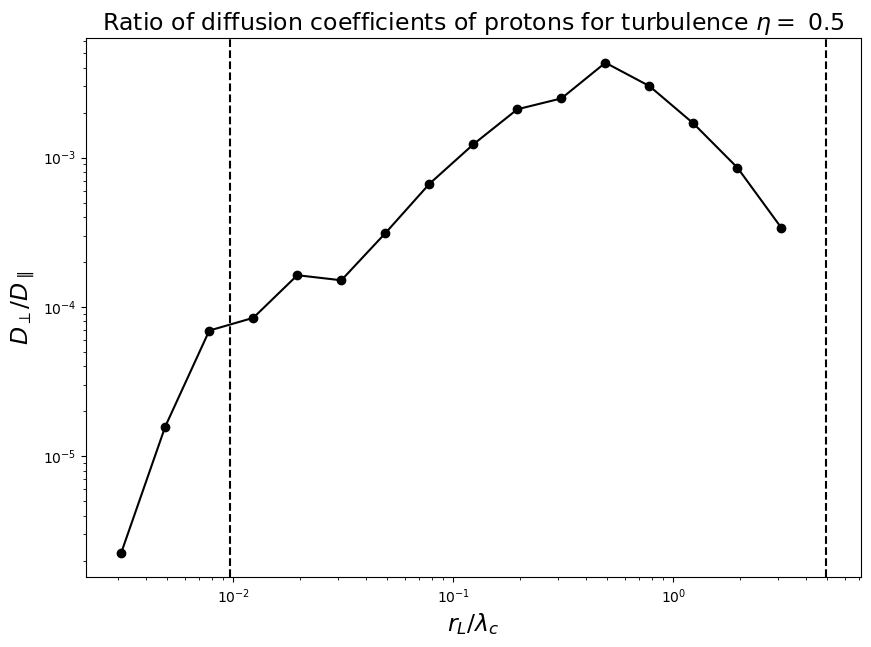

In [1489]:
# Plot of ratio between parallel and perpendicular coefficients
plt.figure(figsize=(10, 7))
plt.plot(ratio, Dxx / Dzz, '-o', color='black', label=r'$D_{xx}/D_{zz}$')
plt.axvline(x = Lmin / l_c, linestyle='--', color='black')
plt.axvline(x = Lmax / l_c, linestyle='--', color='black')
plt.loglog()
plt.xlabel(r'$r_L / \lambda_c$', fontsize=17)
plt.ylabel(r'$D_\perp / D_\parallel$', fontsize=17)
plt.title(r'Ratio of diffusion coefficients of protons for turbulence $\eta =$ {turb}'.format(turb = eta), fontsize=17)
plt.savefig('Plots/TGK/ratio_parallel_perpendicular.pdf')